In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import argparse
import numpy as np
import os
from abc import ABC
sns.set_context('paper', font_scale=1.5)
# parser = argparse.ArgumentParser()
# parser.add_argument("-n", type=int)
# parser.add_argument('--resume-path', type=str, default=None)
# parser.add_argument('--title', type=str, default='default')
# args = parser.parse_args()
class A():
    def __init__(self):
        self.n=29
        self.resume_path="../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full"
        self.title="Q loss(our method)"
args=A()


all_V_loss = []
for seed in os.listdir(args.resume_path):
    if seed.startswith("heatmap"):
        continue
    with open(os.path.join(args.resume_path, str(seed), "Q_tablepickle%d"%args.n), 'rb') as f:
        Q_table = pickle.load(f)
    print("Loaded Q table ", os.path.join(args.resume_path, "Q_tablepickle%d"%args.n))

    V_table = {}
    for key, value in zip(Q_table.keys(), Q_table.values()):
        V_table[key] = np.max(value)
    V_mean = np.average(list(V_table.values()))

    V_loss_table = []
    V_loss_linear = {}
    for i in range(14):
        V_loss_linear[i] = []
    for i in range(1, 8):
        this_loss = []
        for j in range(1, 8):
            real_V = 0.99 ** ((6-i) + (6-j))
            try:
                loss = abs(V_table[(i,j)] - real_V)
            except KeyError:
                # loss = abs(V_mean - real_V)
                loss = 1
            this_loss.append(loss)
            V_loss_linear[14-i-j].append(loss)
        V_loss_table.append(this_loss)
    V_loss_table = np.array(V_loss_table)
    all_V_loss.append(V_loss_table)
mean_V_loss = np.average(all_V_loss, axis=0)

Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29
Loaded Q table  ../../log/MiniGrid-FourRooms-v0/tpdqn/ushape-9-1-7-utd0.6-full/Q_tablepickle29


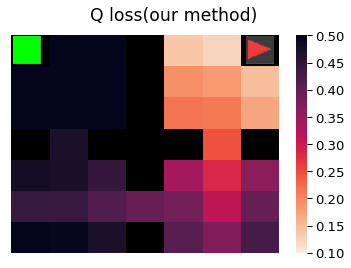

In [79]:
def get_mask1():
    mask = np.zeros((7, 7))
    mask[3, :] = 1
    mask[:, 3] = 1
    mask[3, 1] = 0
    mask[3, 5] = 0
    mask[5, 3] = 0
    mask[0, 6] = 1
    mask[0,0] = 1

    return mask
# ===========plot=============
fig, ax = plt.subplots()

# frame = sns.heatmap(mean_V_loss, cmap="YlGnBu", vmin=0.1, vmax=0.5)
# sns.color_palette("rocket_r", as_cmap=True)
# frame = sns.heatmap(mean_V_loss, vmin=0.1, vmax=0.5, mask=get_mask1(), ax=ax)
frame = sns.heatmap(mean_V_loss, cmap = 'rocket_r', vmin=0.1, vmax=0.5, mask=get_mask1(), ax=ax)
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
frame.set_facecolor("black")
newax = fig.add_axes([0.65, 0.78, 0.1, 0.1])
triangle = plt.imread('fig/triangle.png')
newax.imshow(triangle)
newax.set_xticks([])
newax.set_yticks([])

newax2 = fig.add_axes([0.11, 0.78, 0.1, 0.1])
square = plt.imread('fig/square.png')
newax2.imshow(square)
newax2.set_xticks([])
newax2.set_yticks([])

# =========save fig============
# if not os.path.isdir(os.path.join(args.resume_path, "heatmap")):
#     os.mkdir(os.path.join(args.resume_path, "heatmap"))
fig.suptitle(args.title)
# plt.savefig(os.path.join(args.resume_path, "heatmap", "%d.png"%args.n))
plt.show()